# Linear trend analysis from Tide Gauge

In [4]:
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


## load NetCDF file in ferret

In [5]:
%%ferret
cancel var/all
cancel data/all
use Data/TG/Antarctica_d127.nc
use Data/TG/Gan_d109.nc
use Data/TG/Kanton_d013.nc
use Data/TG/Padang_d107.nc
use Data/AVISO_yearly_1x1deg_Global_1993_2019.nc
use Data/AVISO_trend_monthly.nc

## Define tide gauge data

In [6]:
%%ferret

let Antartica = sea_level[d=1,l=@fln:3] ;   ! "fln"  here represents linear interpolation
let Gan       = sea_level[d=2,l=@fln:3] ;  
let Kantin    = sea_level[d=3,l=@fln:3] ;  
let Pandang   = sea_level[d=4,l=@fln:3] ;

## ! -- linear trend for ~26 years calculation from Antartica tide gauge --

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO


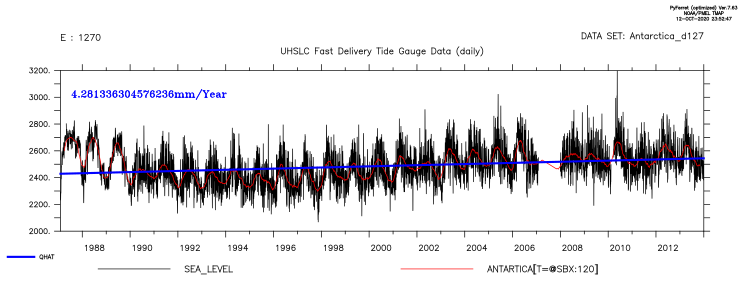

In [7]:
%%ferret
set win/asp=0.4
plot sea_level[d=1],Antartica[d=1,l=@sbx:120]
let p = t[gt=Antartica[d=1]] ; let q = Antartica[d=1,l=@sbx:120] ; go regresst ; plot/over/thick=3/color=blue qhat
label 50000,3000,0,0,0.13  @TR@P4`slope*365`mm/Year

## ! -- linear trend for ~35 years calculation from Gan tide gauge --

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO


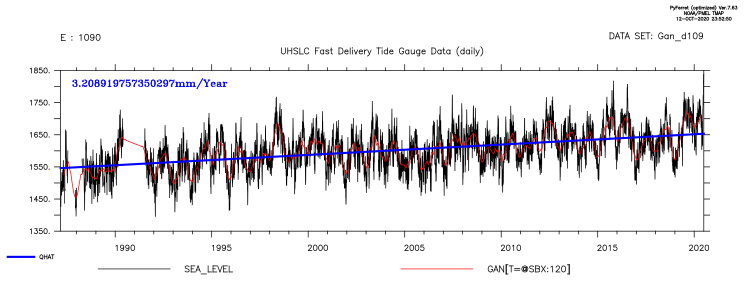

In [8]:
%%ferret
set win/asp=.4
plot sea_level[d=2],Gan[d=2,l=@sbx:120]
let p = t[gt=Gan[d=2]] ; let q = Gan[d=2,l=@sbx:120] ; go regresst ; plot/over/thick=3/color=blue qhat
label 58000,1800,0,0,0.13  @TR@P4`slope*365`mm/Year

## ! -- linear trend for ~45 years calculation from Kantin tide gauge --

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO


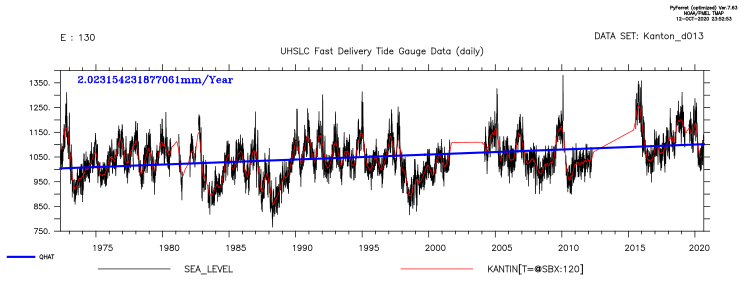

In [9]:
%%ferret
set win/asp=.4
plot sea_level[d=3],Kantin[d=3,l=@sbx:120]
let p = t[gt=Kantin[d=3]] ; let q = Kantin[d=3,l=@sbx:120] ; go regresst ; plot/over/thick=3/color=blue qhat
label 80000,1350,0,0,0.13  @TR@P4`slope*365`mm/Year

## ! -- linear trend for ~15 years calculation from Pandang tide gauge --

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO


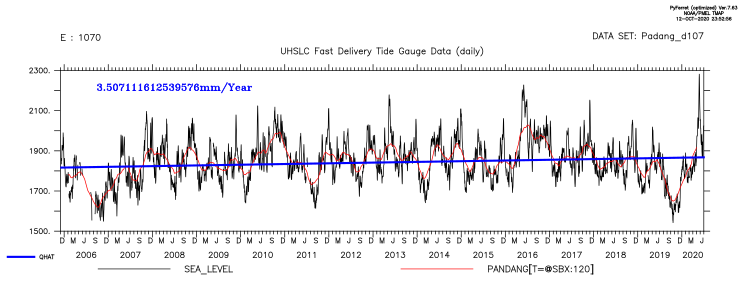

In [10]:
%%ferret
set win/as=.4
plot sea_level[d=4],Pandang[d=4,l=@sbx:120]
let p = t[gt=Pandang[d=4]] ; let q = Pandang[d=4,l=@sbx:120] ; go regresst ; plot/over/thick=3/color=blue qhat
label 40000,2200,0,0,0.13  @TR@P4`slope*365`mm/Year

 ## Linear Trend calculation from Yearly averaged 1x1 degree AVISO sea level anomaly
 ### In Literature :Han et al., 2019. Impacts of Basin-Scale Climate Modes on Coastal Sea Level: a Review.
 ![aviso sea level](Images/AVISO_trend_andTG.png)

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO mp_hammer
! Exit_GO
! Enter_GO mp_grid sla[d=5]
! Exit_GO
! Enter_GO mp_aspect
! Exit_GO
! Enter_GO mp_line plot/vs/over/nolab/thick=5/sym=88/color=black a b
! Exit_GO
! Enter_GO mp_line plot/vs/over/nolab/thick=5/sym=88/color=red a b
! Exit_GO
! Enter_GO mp_line plot/vs/over/nolab/thick=5/sym=88/color=green a b
! Exit_GO
! Enter_GO mp_line plot/vs/over/nolab/thick=5/sym=88/color=blue a b
! Exit_GO
! Enter_GO mp_label 39.5999984741211,-66,0,0,0.13 @TR4.2
! Exit_GO
! Enter_GO mp_label 73.15200042724609,2.313000023365021,0,0,0.13 @TR3.2
! Exit_GO
! Enter_GO mp_label 188.2819976806641,0.190000057220459,0,0,0.13 @TR2.0
! Exit_GO
! Enter_GO mp_label 95.36699676513672,-6,0,0,0.13 @TR3.5
! Exit_GO


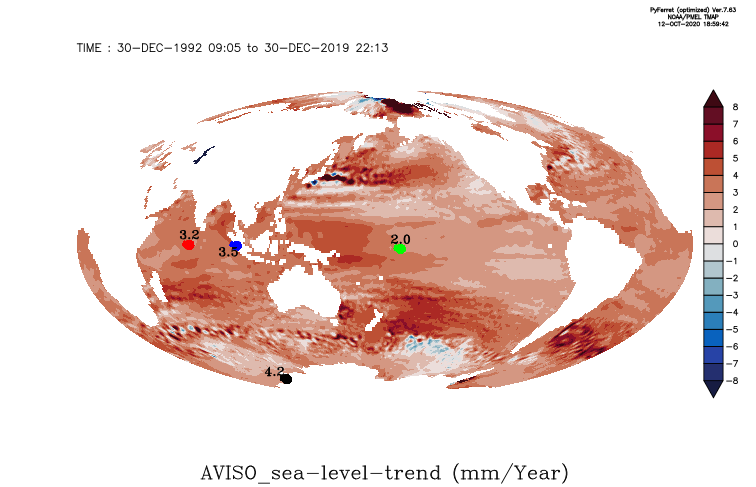

In [64]:
%%ferret
!sh d
set win/asp=.7

let p = t[gt=sla[d=5]] ; let q = sla[d=5] ;  go regresst ; palette cmocean_balance ;

set mem/si=1000
GO mp_hammer ; GO mp_grid sla[d=5] ; GO mp_aspect ; SET GRID q[d=5]
FILL/NOAXIS/lev=(-inf)(-8,8,1)(inf)/title="AVISO_sea-level-trend (mm/Year)" slope*1000*mp_mask, x_page, y_page

let a = `lon[d=1]` + (0)/20 * i ; let b = `lat[d=1]` + (0)/20*i ; go mp_line plot/vs/over/nolab/thick=5/sym=88/color=black  a b
let a = `lon[d=2]` + (0)/20 * i ; let b = `lat[d=2]` + (0)/20*i ; go mp_line plot/vs/over/nolab/thick=5/sym=88/color=red   a b
let a = `lon[d=3]` + (0)/20 * i ; let b = `lat[d=3]` + (0)/20*i ; go mp_line plot/vs/over/nolab/thick=5/sym=88/color=green a b
let a = `lon[d=4]` + (0)/20 * i ; let b = `lat[d=4]` + (0)/20*i ; go mp_line plot/vs/over/nolab/thick=5/sym=88/color=blue  a b

GO mp_label `lon[d=1]`,`lat[d=1]+3`,0,0,0.13 @TR4.2
GO mp_label `lon[d=2]`,`lat[d=2]+3`,0,0,0.13 @TR3.2
GO mp_label `lon[d=3]`,`lat[d=3]+3`,0,0,0.13 @TR2.0
GO mp_label `lon[d=4]-5`,`lat[d=4]-5`,0,0,0.13 @TR3.5

## Global mean sea level  from AVISO


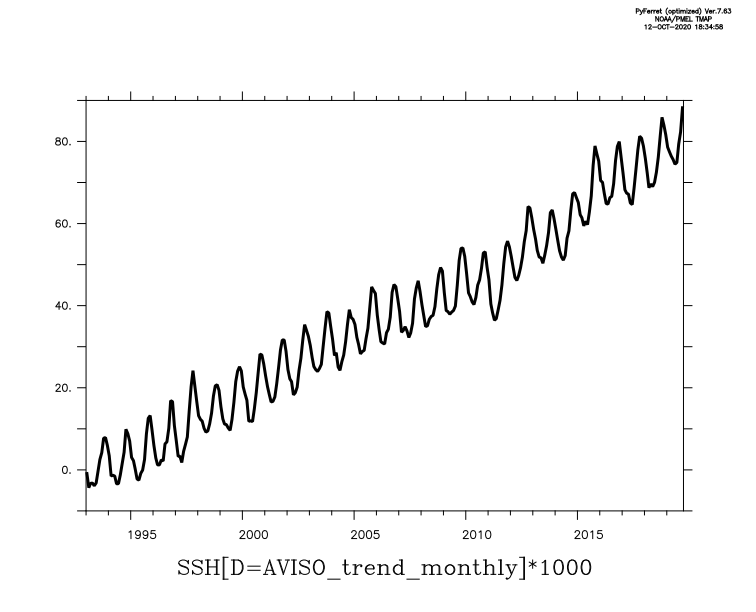

In [26]:
%%ferret
pl/thick=3 ssh[d=6]*1000

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO mp_hammer
! Exit_GO
! Enter_GO mp_grid sla[d=5]
! Exit_GO
! Enter_GO mp_aspect
! Exit_GO


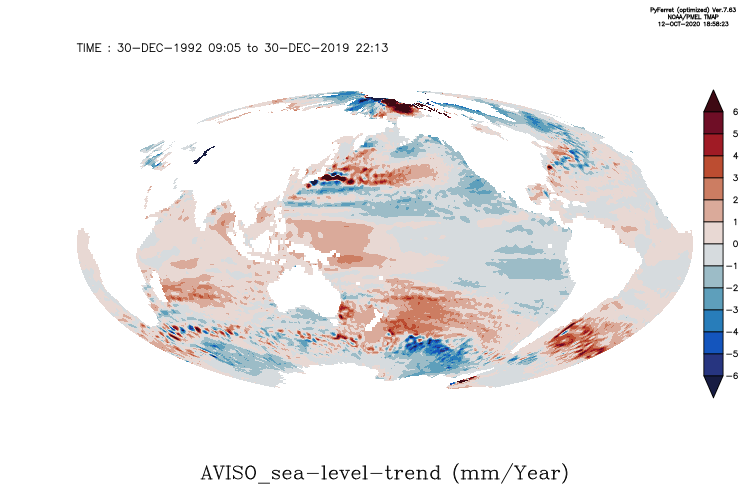

In [62]:
%%ferret
set win/asp=.7

let p = t[gt=sla[d=5]] ; let q = sla[d=5]-ssh[d=6,gt=sla[d=5]] ;  go regresst ; palette cmocean_balance ;

set mem/si=1000
GO mp_hammer ; GO mp_grid sla[d=5] ; GO mp_aspect ; SET GRID q[d=5]
FILL/NOAXIS/lev=(-inf)(-6,6,1)(inf)/title="AVISO_sea-level-trend (mm/Year)" slope*1000*mp_mask, x_page, y_page

## Calculate Climatology and remove climatology to get Anomaly


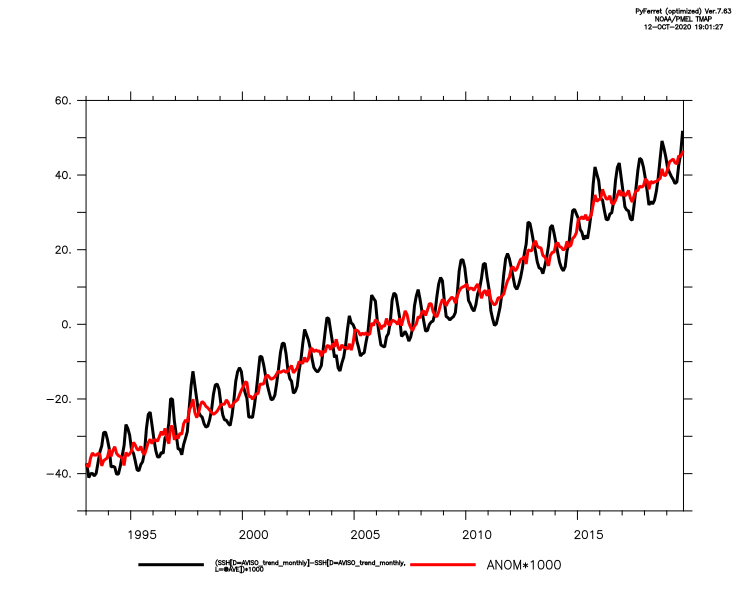

In [66]:
%%ferret
use climatological_axes ; cancel data climatological_axes ; let clim =  ssh[d=6,GT=MONTH_GREGORIAN@MOD] ; let anom = ssh[d=6] - clim[gt=ssh[d=6]@asn]

pl/thick=3 (ssh[d=6]-ssh[d=6,l=@ave])*1000, anom*1000



## Linear regression to find trend in global mean sea level from AVISO 
### in literature : Pugh,D., Sea-level science (2014).
![aviso sea level](Images/AVISO_global_avg_trend.png)

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO


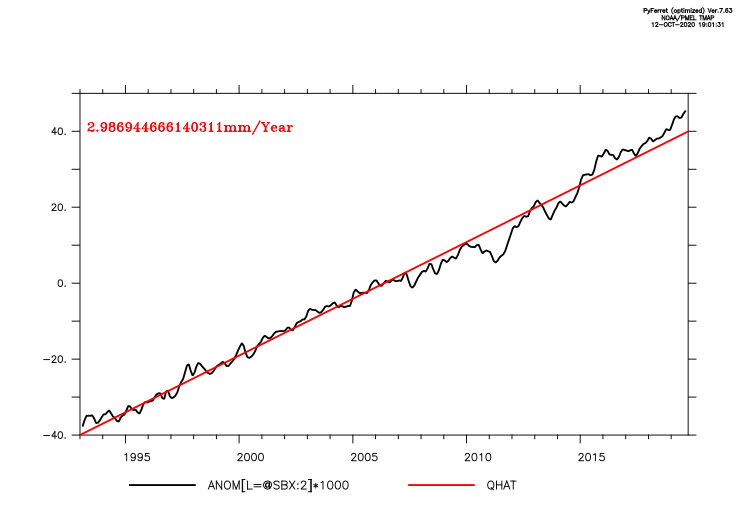

In [67]:
%%ferret
set win/asp=.7
let p =  t[gt=anom] ; let q = anom[l=@sbx:2]*1000 ; go regresst ; pl/thick=2 anom[l=@sbx:2]*1000,qhat

label 60000,40,0,0,0.13  @TR@P2`slope*365`mm/Year

## ! Global average sea level variability after removing Linear TREND


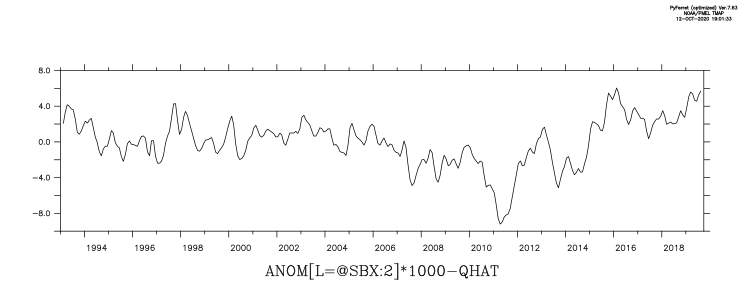

In [68]:
%%ferret
set win/asp=.4
plot anom[l=@sbx:2]*1000-qhat
let sla1 = anom[l=@sbx:2]*1000-qhat